=== A1: Logistic Regression on marketing_campaign sheet ===
Train Confusion Matrix:
 [[1462   39]
 [ 210   61]]
Test Confusion Matrix:
 [[362  20]
 [ 43  19]]
Train Accuracy: 0.8594808126410836
Test Accuracy: 0.8581081081081081
Fit Status: Regularfit

Train Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1501
           1       0.61      0.23      0.33       271

    accuracy                           0.86      1772
   macro avg       0.74      0.60      0.63      1772
weighted avg       0.83      0.86      0.83      1772

Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       382
           1       0.49      0.31      0.38        62

    accuracy                           0.86       444
   macro avg       0.69      0.63      0.65       444
weighted avg       0.84      0.86      0.84       444



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


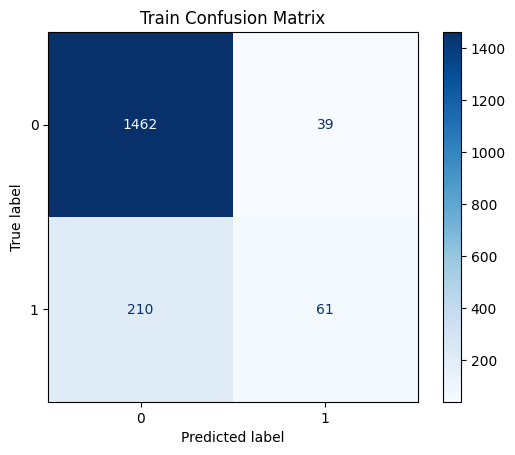

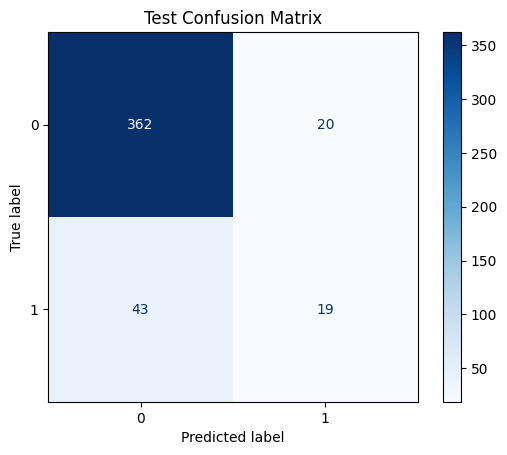

Model Evaluation Metrics:
  MSE  (Mean Squared Error):      118.44
  RMSE (Root Mean Squared Error): 10.88
  MAPE (Mean Absolute % Error):   0.48%
  R² Score (R-squared):           0.9980


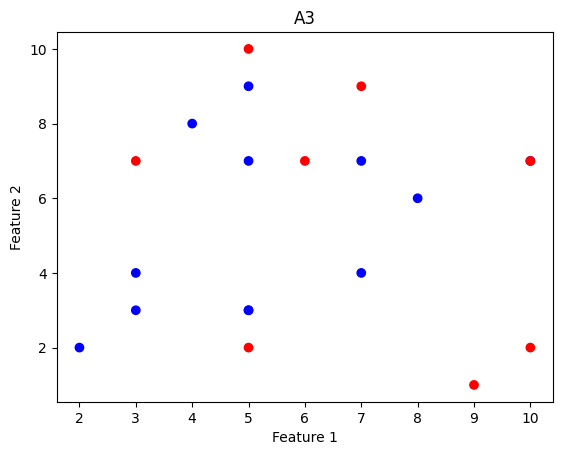

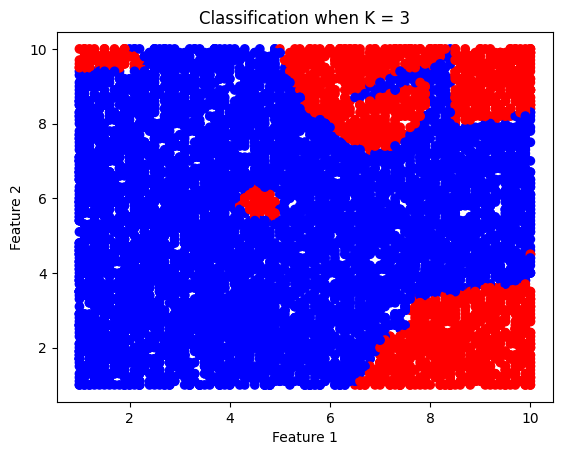

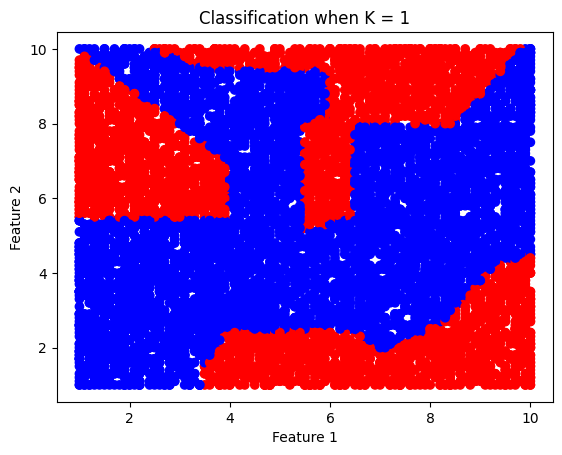

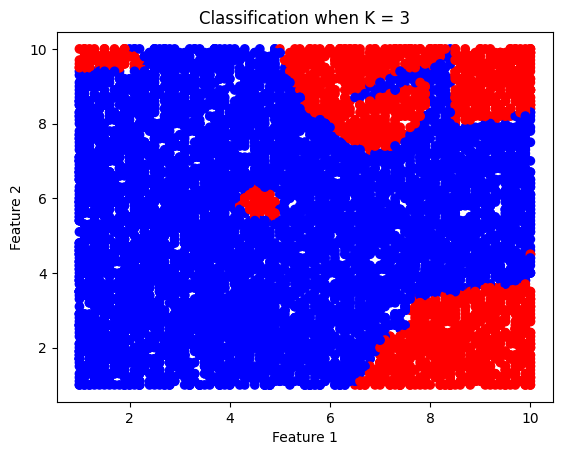

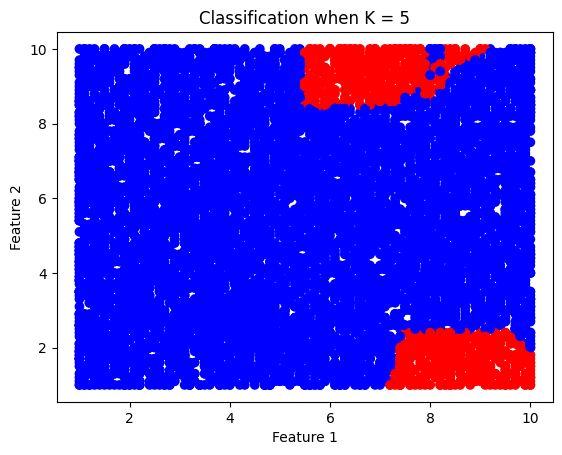

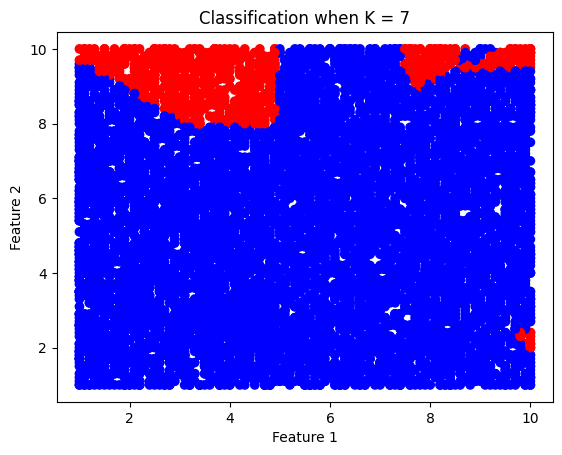

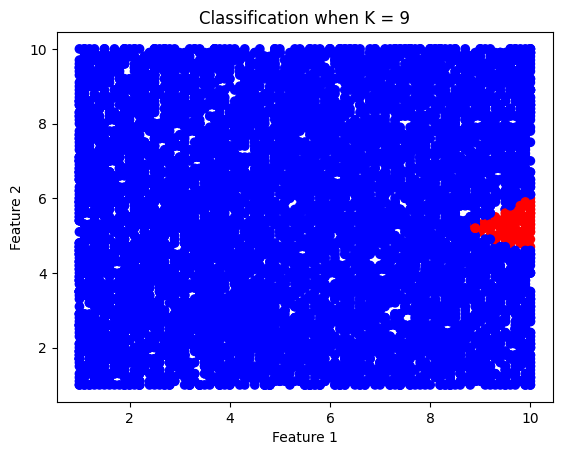

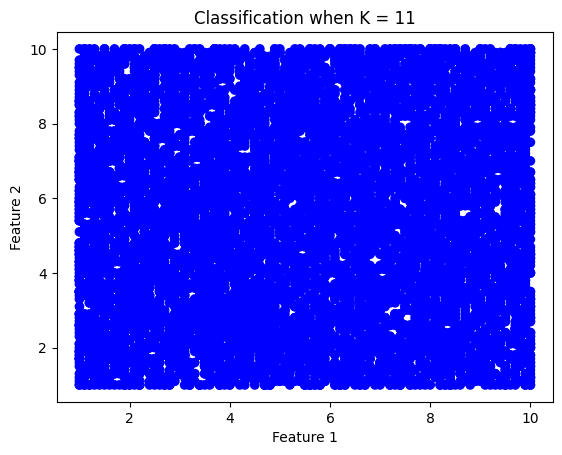

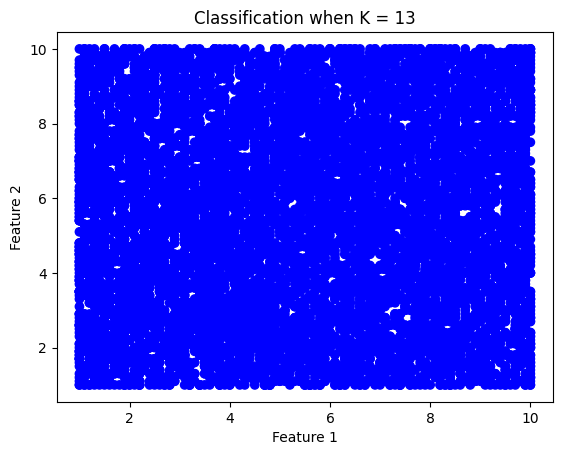

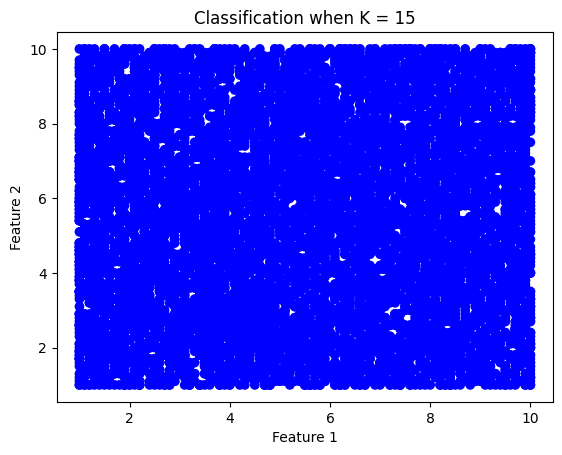

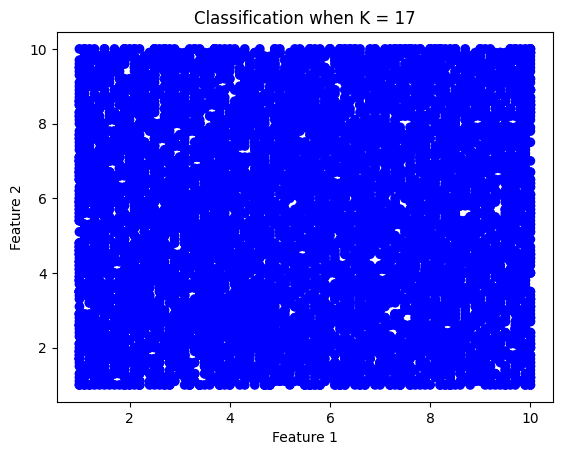

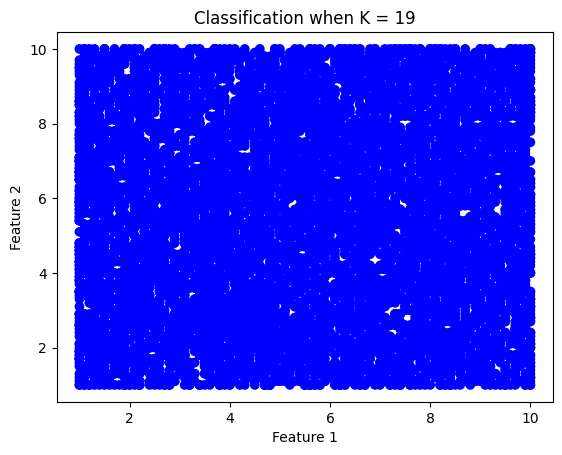

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

           Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0  2012-04-09 00:00:00       58       635  ...                  7   
1  2014-08-03 00:00:00       38        11  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  

[2 rows x 29 columns]
Null values
ID                          0
Income                     24
Kidhome                     0
Teenhome                    0
Recency                   

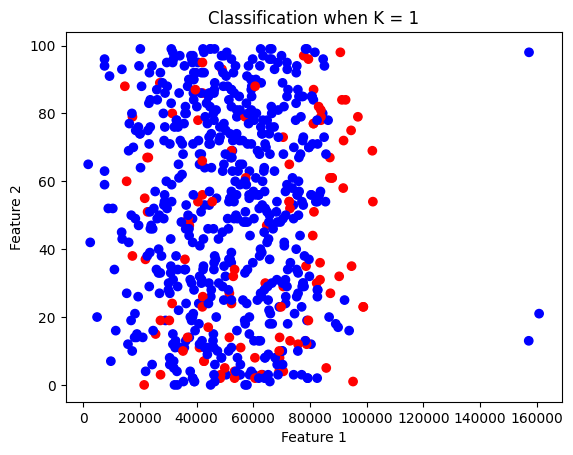

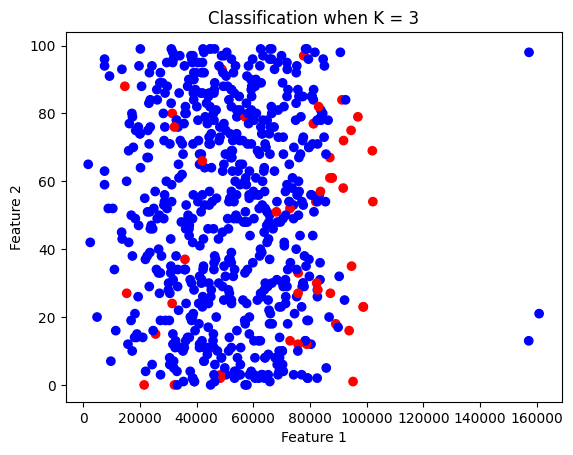

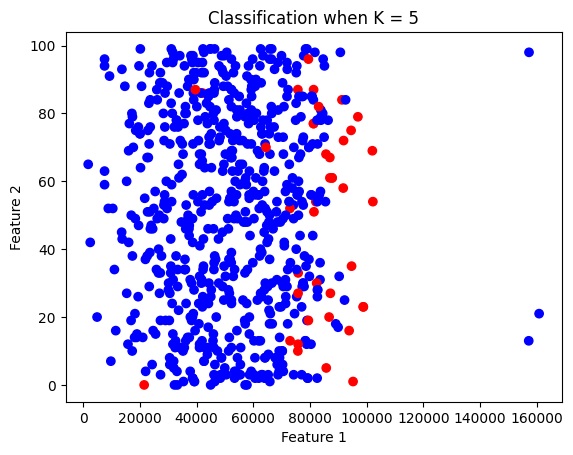

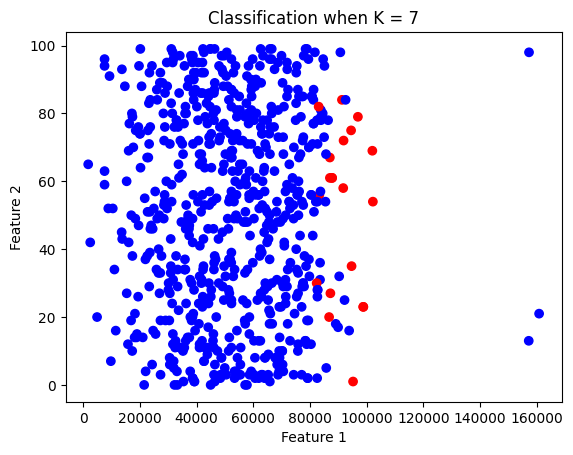

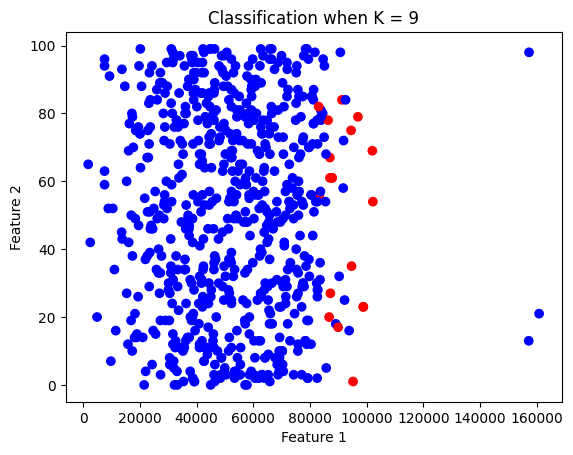

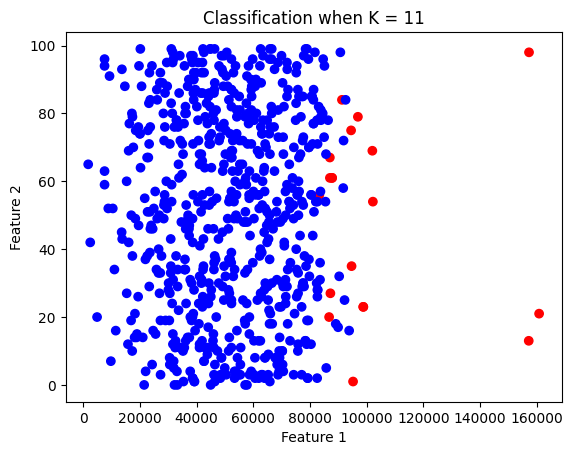

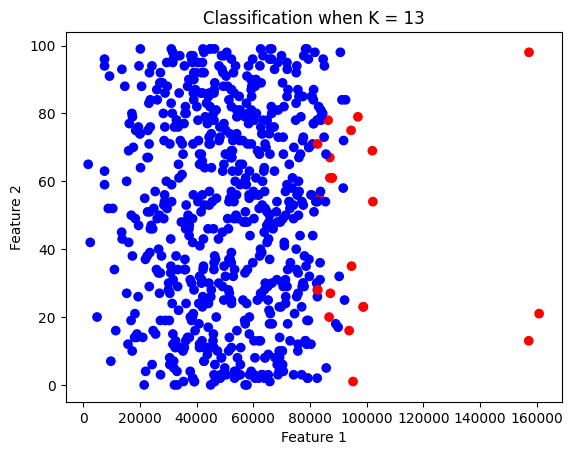

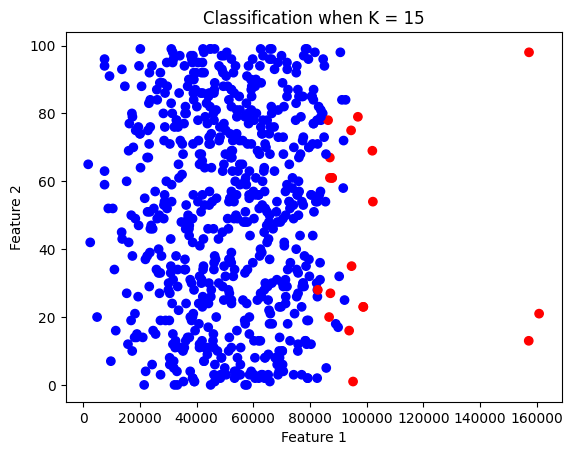

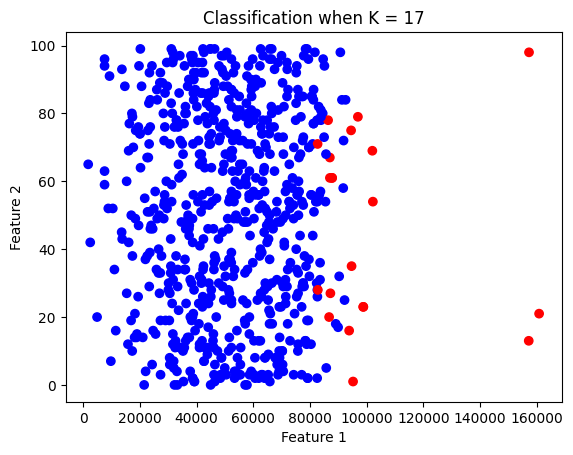

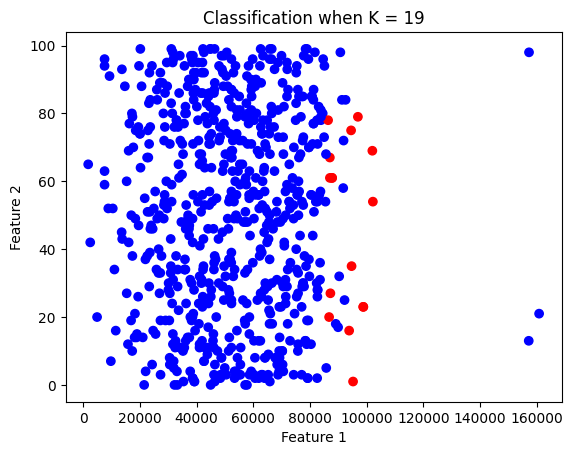

Best parameters and score for the synthetic data generated ({'weights': 'uniform', 'n_neighbors': np.int64(3), 'metric': 'minkowski'}, np.float64(0.6))
Best parameters and score for the marketing campaign data ({'weights': 'distance', 'n_neighbors': np.int64(33), 'metric': 'euclidean'}, np.float64(0.8628904580696364))


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)


def preprocess_marketing_data(filepath):
    df = pd.read_excel(filepath, sheet_name="marketing_campaign")
    df.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True)
    df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
    df.dropna(inplace=True)
    return df

def split_features_target(df, target_col):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_logistic_model(X_train, y_train):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    return model

def evaluate_classification_model(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred)
    return cm, report, y_pred

def show_confusion_matrix(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.grid(False)
    plt.show()

def get_fit_status(train_acc, test_acc):
    if abs(train_acc - test_acc) < 0.05:
        return "Regularfit"
    elif train_acc > test_acc:
        return "Overfit"
    else:
        return "Underfit"



def run_a1_logistic_regression():
    print("=== A1: Logistic Regression on marketing_campaign sheet ===")
    df_mc = preprocess_marketing_data("Lab Session Data.xlsx")
    X_train, X_test, y_train, y_test = split_features_target(df_mc, 'Response')

    model = train_logistic_model(X_train, y_train)

    train_cm, train_report, _ = evaluate_classification_model(model, X_train, y_train)
    test_cm, test_report, _ = evaluate_classification_model(model, X_test, y_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    print("Train Confusion Matrix:\n", train_cm)
    print("Test Confusion Matrix:\n", test_cm)
    print("Train Accuracy:", train_acc)
    print("Test Accuracy:", test_acc)
    print("Fit Status:", get_fit_status(train_acc, test_acc))

    print("\nTrain Classification Report:\n", train_report)
    print("Test Classification Report:\n", test_report)

    # Show confusion matrices
    show_confusion_matrix(train_cm, "Train Confusion Matrix")
    show_confusion_matrix(test_cm, "Test Confusion Matrix")







def load_and_clean_data(file_path):
    """
    Loads the CSV file, removes unwanted characters from numeric columns,
    and returns a cleaned DataFrame.
    """
    df = pd.read_csv(file_path).dropna(how='all')

    # Clean numeric columns: remove commas and convert to float
    for column in ['Price', 'Open', 'High', 'Low']:
        df[column] = df[column].str.replace(",", "").astype(float)

    # Clean percentage column: remove '%' and convert to float
    df['Chg%'] = df['Chg%'].str.replace('%', '').astype(float)

    # Clean categorical text columns
    df['Day'] = df['Day'].str.strip()
    df['Month'] = df['Month'].str.strip()

    return df

def train_regression_model(features, target):
    """
    Trains a Linear Regression model on the given features and target.
    Returns the trained model and predicted values.
    """
    model = LinearRegression()
    model.fit(features, target)
    predictions = model.predict(features)
    return model, predictions

def calculate_regression_metrics(actual_values, predicted_values):
    """
    Calculates and returns MSE, RMSE, MAPE, and R-squared for model evaluation.
    """
    mse_score = mean_squared_error(actual_values, predicted_values)
    rmse_score = np.sqrt(mse_score)
    mape_score = mean_absolute_percentage_error(actual_values, predicted_values)
    r2_score_value = r2_score(actual_values, predicted_values)

    return mse_score, rmse_score, mape_score, r2_score_value




def generateData(n_features, n_classes, step, n_data_pts, lower_limit, upper_limit):
  possible_values = np.array(np.arange(lower_limit, upper_limit + step, step))
  possible_class_labels = np.arange(n_classes)
  data = {}
  for i in range(n_features):
    data[f"X{i+1}"] = np.random.choice(possible_values, n_data_pts)
  data["target"] = np.random.choice(possible_class_labels, n_data_pts)

  df = pd.DataFrame(data)

  return df

def plotData(feature1, feature2, target, color_map, title):
  plt.scatter(feature1, feature2, c= [color_map[pt] for pt in target])
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.title(title)
  plt.show()

def knnModel(X_train, X_test, y_train, y_test, k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  predictions = knn.predict(X_test)
  return predictions

def modelTuning(X_train, y_train, X_test, y_test):
  knn = KNeighborsClassifier()
  params = {
    "n_neighbors": np.arange(1,int(len(X_train)**0.5), 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
  }
  rscv = RandomizedSearchCV(knn, params, cv=5)
  rscv.fit(X_train, y_train)
  return rscv.best_params_, rscv.best_score_

if __name__ == "__main__":
 #A1
  run_a1_logistic_regression()
  #A2
  #Load and preprocess the data
  df = pd.read_excel("Lab Session Data.xlsx", sheet_name = "marketing_campaign")
  file_path = "stock_price.csv"  # Ensure this file is in the same directory
  stock_data = load_and_clean_data(file_path)

  # Select input features and target variable
  input_features = stock_data[['Open', 'High', 'Low']]
  target_price = stock_data['Price']

   # Train model and get predictions
  model, predicted_price = train_regression_model(input_features, target_price)

  # Evaluate the model
  mse, rmse, mape, r2 = calculate_regression_metrics(target_price, predicted_price)

   # Display the evaluation results
  print("Model Evaluation Metrics:")
  print(f"  MSE  (Mean Squared Error):      {mse:.2f}")
  print(f"  RMSE (Root Mean Squared Error): {rmse:.2f}")
  print(f"  MAPE (Mean Absolute % Error):   {mape * 100:.2f}%")
  print(f"  R² Score (R-squared):           {r2:.4f}")

  #A3
  train  = generateData(2, 2, 1, 20, 1, 10)
  plotData(train["X1"], train["X2"], train["target"],{0: "blue", 1: "red"}, "A3")
 #A4
  test = generateData(2, 2, 0.1, 10000, 1, 10)
  predictions = knnModel(train[["X1", "X2"]], test[["X1", "X2"]], train["target"], test["target"], 3)
  plotData(test["X1"], test["X2"], predictions, {0: "blue", 1: "red"}, "Classification when K = 3")

  #A5
  for i in range(1,21,2):
    predictions = knnModel(train[["X1", "X2"]], test[["X1", "X2"]], train["target"], test["target"], i)
    plotData(test["X1"], test["X2"], predictions, {0: "blue", 1: "red"}, f"Classification when K = {i}")

  #A6
  # reading the data
  df = pd.read_excel("Lab Session Data.xlsx", sheet_name = "marketing_campaign")
  print(df.head(2))

  # data preprocessing
  df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], dtype=int)
  df["Age"] = datetime.now().year - df["Year_Birth"]
  df = df.drop(columns=['Year_Birth', 'Dt_Customer'])

  print("Null values")
  print(df.isnull().sum())

  df = df.fillna(df.mean())
  print("null values")
  print(df.isnull().sum())

  # splitting the data for model training

  X = df[["Income", "Recency"]]
  # target variable for 2 chosen classes with label encoding
  y = df["Response"]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  # observing class boundaries for different k values
  print("Class boundaries for different k values for marketing campaign")
  for i in range(1,21, 2):
    predictions = knnModel(X_train, X_test, y_train, y_test, i)
    plotData(X_test["Income"], X_test["Recency"], predictions, {0: "blue", 1: "red"}, f"Classification when K = {i}")




  # A7
  print("Best parameters and score for the synthetic data generated",modelTuning(train[["X1", "X2"]], train["target"], test[["X1", "X2"]], test["target"]))
  print("Best parameters and score for the marketing campaign data",modelTuning(X_train, y_train, X_test, y_test))